In [1]:
from pylab import *
x=rand(100)
X=fft(x)
y=ifft(X)
c_[x,y]
print(abs(x-y).max())

3.3453766050442644e-16


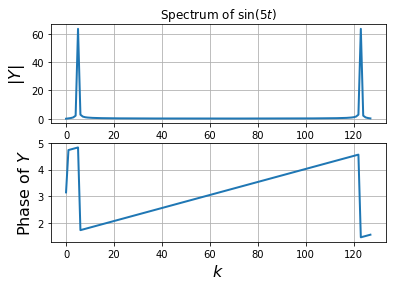

In [2]:
x=linspace(0,2*pi,128)
y=sin(5*x)
Y=fft(y)
figure()
subplot(2,1,1)
plot(abs(Y),lw=2)
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin(5t)$")
grid(True)
subplot(2,1,2)
plot(unwrap(angle(Y)),lw=2)
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$k$",size=16)
grid(True)
savefig("fig9-1.png")
show()

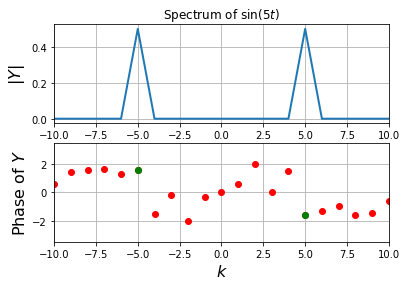

In [3]:
x=linspace(0,2*pi,129);x=x[:-1]
y=sin(5*x)
Y=fftshift(fft(y))/128.0
w=linspace(-64,63,128)
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-10,10])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin(5t)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
ii=where(abs(Y)>1e-3)
plot(w[ii],angle(Y[ii]),'go',lw=2)
xlim([-10,10])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$k$",size=16)
grid(True)
savefig("fig9-2.png")
show()

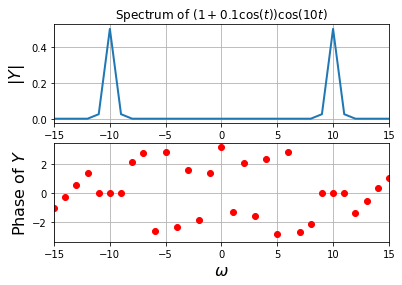

In [4]:
t=linspace(0,2*pi,129);t=t[:-1]
y=(1+0.1*cos(t))*cos(10*t)
Y=fftshift(fft(y))/128.0
w=linspace(-64,63,128)
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-15,15])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-15,15])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
savefig("fig9-3.png")
show()

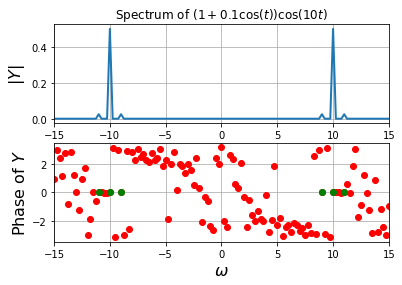

In [5]:
t=linspace(-4*pi,4*pi,513);t=t[:-1]
y=(1+0.1*cos(t))*cos(10*t)
Y=fftshift(fft(y))/512.0
w=linspace(-64,64,513);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-15,15])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-15,15])
ii=where(abs(Y)>1e-3)
plot(w[ii],angle(Y[ii]),'go',lw=2)
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
savefig("fig9-4.png")
show()

In [96]:
def dft(func,tim= None,n_p=512,fig_no=0,name= None):
    if tim is None:
        t=linspace(-4*pi,4*pi,n_p,endpoint= False)
    else:
        start,end = tim
        t = linspace(start,end,n_p,endpoint=False)
    
    y = func(t)
    plot(t,y)
    show()
    Y=fftshift(fft(ifftshift(y)))/n_p
    w=linspace(-pi,pi,n_p,endpoint= False);
    w = w*n_p/(en8d-start)
    figure(fig_no)
    fig, (ax1, ax2) = plt.subplots(2, 1)
    Ysig = where(abs(Y)>10**-5)
    print(max(w[Ysig]))
    ax1.plot(w,abs(Y),lw=1)
    ax1.set_xlim([-2*max(w[Ysig]),2*max(w[Ysig])])

    ax1.set_ylabel(r"$|Y|$",size=16)
    title("Spectrum of {}".format(name))
    ax1.grid(True)
    ax2.plot(w[Ysig],angle(Y[Ysig]),'ro')
    
    ax2.set_xlim([-2*max(w[Ysig]),2*max(w[Ysig])])

    ax2.set_ylabel(r"Phase of $Y$",size=16)
    ax2.set_xlabel(r"$\omega$",size=16)
    grid(True)
    return ax1,ax2,w

y1 = lambda t : (cos(t))**3
y2 = lambda t : (sin(t))**3
y3 = lambda t : cos(20*t+5*cos(t))

#dft(y1,(-4*pi,4*pi),256,1,r'$cos^{3}t$')
#dft(y2,(-2*pi,2*pi),256,2,r"$sin^{3}t$")
#dft(y3,(-4*pi,4*pi),2048,3,r"cos(20t+5cos(t))")
#plt.show()

3.361875652021367e-08


<Figure size 432x288 with 0 Axes>

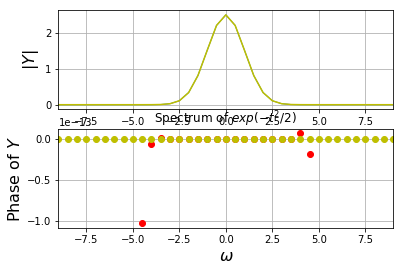

In [135]:
def estctft(func,truth,tim= None,n_p=512,fig_no=0,name= None,):
    if tim is None:
        start=-4*pi
        end=4*pi
    else:
        start,end = tim
    t = linspace(end,start,n_p,endpoint=False)
    y = func(t)
    Y=fftshift(fft(ifftshift(y)))*(end-start)/(n_p)
    w=linspace(-pi,pi,n_p,endpoint= False);
    w = w*n_p/(end-start)
    
    
    error = sum(abs(truth(w)-Y))
    print(error)
    figure(fig_no)
    fig, (ax1, ax2) = plt.subplots(2, 1)
    Ysig = where(abs(Y)>10**-5)
    ax1.plot(w,abs(Y),lw=1)
    ax1.set_xlim([-2*max(w[Ysig]),2*max(w[Ysig])])

    ax1.set_ylabel(r"$|Y|$",size=16)
    title("Spectrum of {}".format(name))
    ax1.grid(True)
    ax2.plot(w[Ysig],angle(Y[Ysig]),'ro')
    ax2.set_xlim([-2*max(w[Ysig]),2*max(w[Ysig])])

    ax2.set_ylabel(r"Phase of $Y$",size=16)
    ax2.set_xlabel(r"$\omega$",size=16)
    grid(True)
    return ax1,ax2,w

y4 = lambda t : exp(t**2/-2)
y5 = lambda w : exp(-w**2/2)*sqrt(2*pi)
start = 2*pi
ax1,ax2,w = estctft(y4,y5,(-start,start),1024,4,r"$exp(-t^{2}/2)$")
ax1.plot(w,abs(y5(w)),'y-')
ax2.plot(w,angle(y5(w)),'yo')
show()
